<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Hair_Style_Recognition/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hair Style Recognition**
This project is for detecting Hair Styles from Images:
1.   Bob
2.   Medium length hair
1.   Pixie cut
1.   French braid
1.   Bangs
2.   Crew cut
1.   Bun
2.   Ponytail
1.   Pigtail
2.   Curly
1.   Dreadlocks
2.   Mohawk
1.   Afro
2.   Feathered hair
1.   Crown braid
2.   Long wavy hair
1.   Spiky hair
2.   Combover
1.   Plaits
2.   Ringlets
1.   Bowl cut
1.   Mullet



In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Hair Styles

/content/drive/My Drive/Hair Styles


# **Data Collecting**

In [ ]:
doc (search_images_ddg)

In [ ]:
hair_styles=[
    "Bob Hair",
    "Medium length hair",
    "Pixie cut",
    "French braid",
    "Bangs",
    "Crew cut",
    "Bun Style",
    "Ponytail hair",
    "Pigtail Hair",
    "Curly",
    "Dreadlocks",
    "Mohawk",
    "Afro",
    "Feathered hair",
    "Crown braid",
    "Long wavy hair",
    "Spiky hair",
    "Combover hair",
    "Plaits hair",
    "Ringlets Hair",
    "Bowl cut",
    "Mullet"
]

len(hair_styles)

22

In [ ]:
path = 'types_of_styles'

In [ ]:

if not os.path.exists(path):
  os.mkdir(path)

for hair_type in hair_styles:
  types = f"{path}/{hair_type}"
  if not os.path.exists(types):
    os.mkdir(types)

  try:
    hair_style_image_urls = search_images_ddg(hair_type)
    download_images(types, urls=hair_style_image_urls)
  except:
    continue

In [ ]:
image_counts = get_image_files(path)
image_counts

(#4295) [Path('types_of_styles/Bob Hair/5fdc55fb-b983-4340-b29f-329aa551f70c.JPG'),Path('types_of_styles/Bob Hair/208b1cb8-2417-424e-b835-eab688b8fff3.jpg'),Path('types_of_styles/Bob Hair/f3b97a94-9cc0-4805-b4aa-2fc8a20c41c3.jpg'),Path('types_of_styles/Bob Hair/1ec9902f-d248-4b39-9d4b-20ed4e469044.jpg'),Path('types_of_styles/Bob Hair/ce69c6e3-8246-42b9-a2e2-6ee7204341a4.jpg'),Path('types_of_styles/Bob Hair/647b63b8-f3bb-4ac8-a60b-28237b061256.jpg'),Path('types_of_styles/Bob Hair/3dc446cc-3dbc-494b-a9e1-429467a460be.jpg'),Path('types_of_styles/Bob Hair/d4b6f36f-70a5-4865-9787-54facd2fa7d5.jpg'),Path('types_of_styles/Bob Hair/face796c-df23-4fd0-b340-27c60c9eae78.jpg'),Path('types_of_styles/Bob Hair/7758705c-a4c0-4430-a6af-66ced7fc3f3c.jpg')...]

**Failed Images detection and Remove**

In [ ]:
failed = verify_images(image_counts)
failed

(#105) [Path('types_of_styles/Bob Hair/bd1c2e9f-14d3-40b1-8ce8-3fa0877813e7.jpg'),Path('types_of_styles/Bob Hair/a54aa0fc-2df2-4f49-8035-60c4934dd840.jpg'),Path('types_of_styles/Bob Hair/95f8d756-71b5-4053-96d3-ead32904011f.jpg'),Path('types_of_styles/Medium length hair/fad526d1-f734-424e-be98-1ce1898c43d2.jpg'),Path('types_of_styles/Medium length hair/1e01aaeb-c2bd-4ff1-8cf1-67536221d45b.jpg'),Path('types_of_styles/Medium length hair/316f888d-ca08-48b4-a9c8-c5442048670e.jpg'),Path('types_of_styles/Medium length hair/04f9a301-a9d8-4a7f-97ea-365b23c4ca0e.jpg'),Path('types_of_styles/Pixie cut/87710ba1-632f-43a9-8292-380c1ba002af.jpg'),Path('types_of_styles/Pixie cut/fe273176-d690-4da6-9d64-dd6176dc84c8.jpg'),Path('types_of_styles/Pixie cut/3a6ae8e9-8d17-4dc7-b943-8cdb4388e9bc.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#105) [None,None,None,None,None,None,None,None,None,None...]

**Moving to Data Loaders**

In [ ]:
#doc(DataBlock)
dblock= DataBlock(
    blocks=(ImageBlock,CategoryBlock),                         
    get_items = get_image_files,                               #get_image_files returns the images from the path 
    splitter = RandomSplitter(valid_pct=0.1,seed=42),          #splitting tarin validation
    get_y=parent_label,                                        #taking the folder name and making it the label of the files
    item_tfms=Resize(128)                                      #resizing the items in 128
)  

In [ ]:
dls = dblock.dataloaders(path, bs=bs)               #setting up batch size for using GPU efficiently dls=data loaders bs = 8 ->batch size

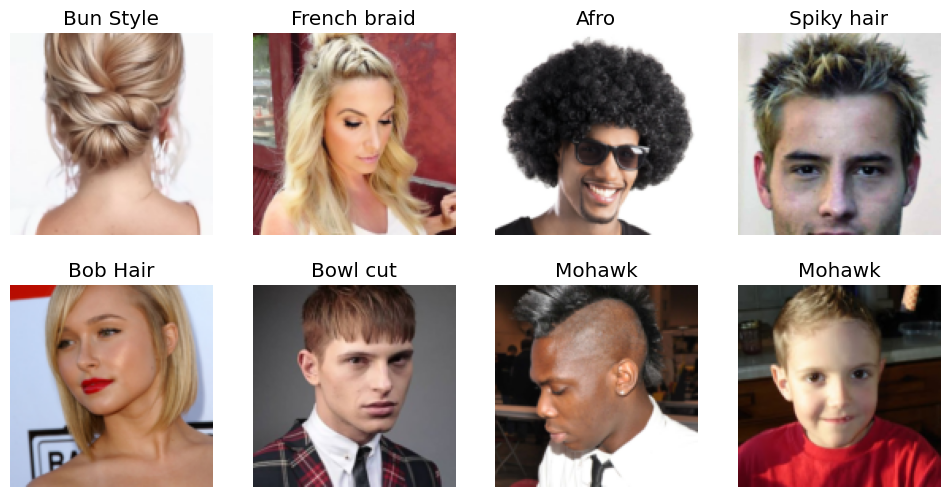

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

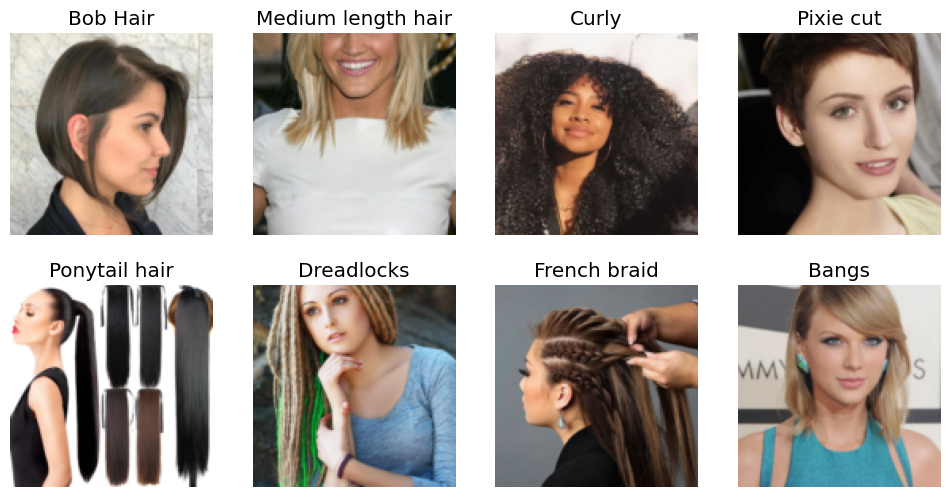

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

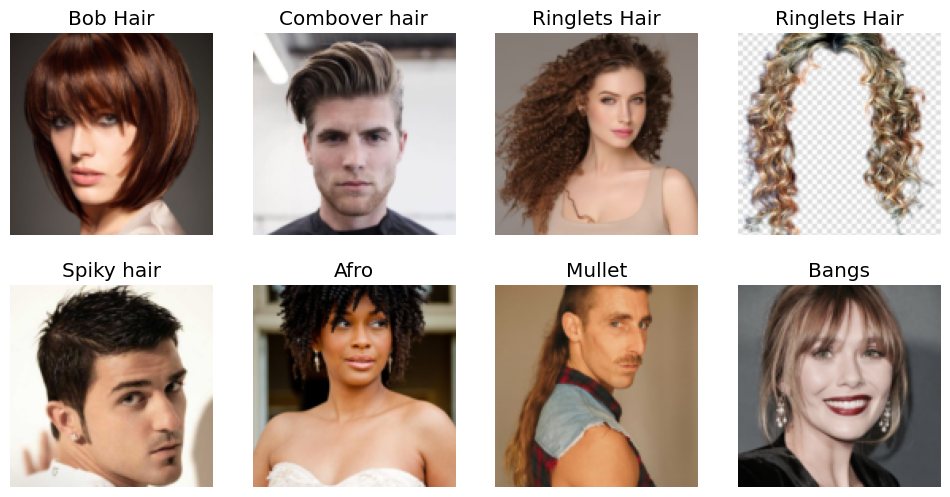

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

**Data Augmentation**

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data

`ResizeMethod` -> All possible resize method as attributes to get tab-completion and typo-proofing

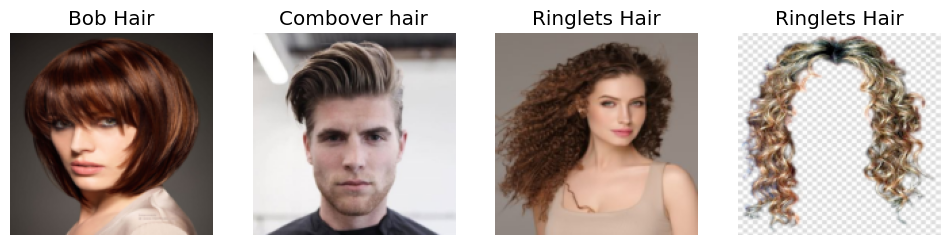

In [ ]:
dblock =dblock.new(item_tfms=Resize(150, ResizeMethod.Squish)) #ResizeMethod->  ResizeMethod(*args, **kwargs) -> Squishes Image into (150x150)
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

`RandomResizedCrop` -> Picks a random scaled crop of an image and resize it to `size`

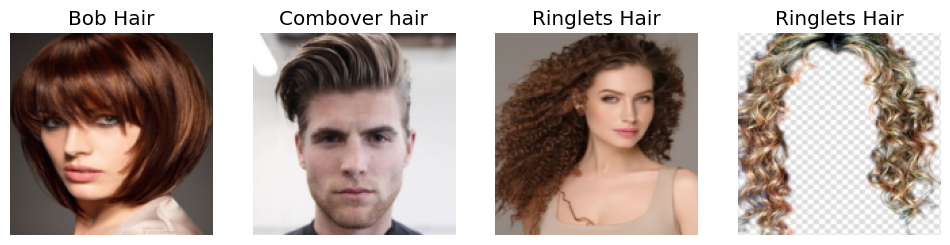

In [ ]:
dblock =dblock.new(item_tfms=RandomResizedCrop(150, min_scale=0.3))
"""
RandomCrop-> RandomCrop (size:int|tuple, **kwargs) Randomly Crops, resizes, colors,parts of images into (150x150) size
"""
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

`pad_mode` -> Type= str, Default= refelection, Description=	A PadMode

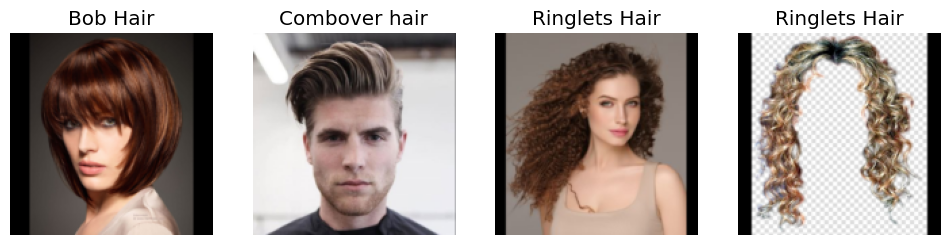

In [ ]:
dblock =dblock.new(item_tfms=Resize(150, ResizeMethod.Pad, pad_mode='zeros'))
#padding extra spaced the whole image
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
doc(aug_transforms)

`aug_transforms` -> Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.
`RandomResizedCrop` -> Picks a random scaled crop of an image and resize it to `size` (We running aug_transforms on GPU cause it's faster than running it on CPU)

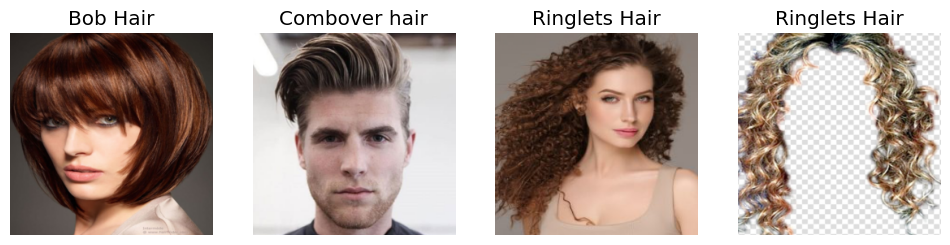

In [ ]:
dblock =dblock.new(item_tfms=RandomResizedCrop(250, min_scale=0.5), batch_tfms= aug_transforms())
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
torch.save(dls,"hair_style_v0.pkl")